# 1 - Importando Bibliotecas e recursos

In [1]:
!pip install fastparquet Unidecode seaborn nltk scikit-learn wordcloud transformers datasets xgboost==0.90

In [2]:
import pandas as pd
import fastparquet

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from string import punctuation
from nltk import tokenize, ngrams
import unidecode
import numpy as np
import re
import os
import shutil

# Sklearn
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from wordcloud import WordCloud
import matplotlib.pyplot as plt

#---------- Recursos ----------#
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')


#---------- Transformers ----------#
from datasets import Dataset
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer, DataCollatorWithPadding
import tensorflow as tf

from joblib import dump, load


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

!cp /content/drive/MyDrive/INF-0619/FINAL/B2W-Reviews01-tratada-v2.parquet ./

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!cp -av  /content/drive/MyDrive/INF-0619/binary_classifier_saved/ ./
!cp -av  /content/drive/MyDrive/INF-0619/joblib/ ./

'/content/drive/MyDrive/INF-0619/binary_classifier_saved/config.json' -> './binary_classifier_saved/config.json'
'/content/drive/MyDrive/INF-0619/binary_classifier_saved/tf_model.h5' -> './binary_classifier_saved/tf_model.h5'
'/content/drive/MyDrive/INF-0619/joblib/binary_randomforest.joblib' -> './joblib/binary_randomforest.joblib'
'/content/drive/MyDrive/INF-0619/joblib/binary_gridsearch.joblib' -> './joblib/binary_gridsearch.joblib'


In [5]:


df = pd.read_parquet('/content/B2W-Reviews01-tratada-v2.parquet')
df

,submission_date,reviewer_id,product_id,product_name,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_gender,reviewer_state,idade,review_id,polarity
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,F,RJ,65.0,0,Positivo
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",M,SC,27.0,1,Positivo
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,M,SP,39.0,2,Positivo
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,F,SP,38.0,3,Positivo
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",M,MG,29.0,4,Positivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120327,2018-05-31 23:30:50,15f20e95ff44163f3175aaf67a5ae4a94d5030b409e521...,17962233,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,Câmeras e Filmadoras,Acessórios para Câmeras e Filmadoras,Ótimo produto!,5,Yes,"Vale muito, estou usando no controle do Xbox e...",M,RS,35.0,120327,Positivo
120328,2018-05-31 23:42:25,def7cf9028b0673ab8bca3b1d06e085461fafb88cd48d9...,132631701,Mop Giratório Fit + Refil Extra - At Home,Utilidades Domésticas,Material de Limpeza,Sensacional,5,Yes,"Prático e barato, super indico o produto para ...",F,SP,44.0,120328,Positivo
120329,2018-05-31 23:44:16,7bcbf542f5d7dd9a9a192a6805adba7a7a4c1ce3bf00df...,16095859,Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...,Automotivo,Iluminação,Ótimo produto,4,Yes,Chegou antes do prazo previsto e corresponde a...,F,PR,44.0,120329,Positivo
120330,2018-05-31 23:46:48,e6fb0b19277d01c2a300c7837a105f3c369377e92f9c19...,6774907,Etiquetas Jurídicas Vade Mecum - Marca Fácil,Papelaria,Material de Escritório,O produto não é bom.,1,No,"Material fraco, poderia ser melhor. Ficou deve...",M,RJ,32.0,120330,Negativo


## 2 -  Transformando o problema em um modelo Binário

Reparamos que a escala de 1 a 5 é apenas uma classificação. O verdadeiro preenchimento é categorico e tem um sentido léxico bem diferente.

![image.png](attachment:image.png)

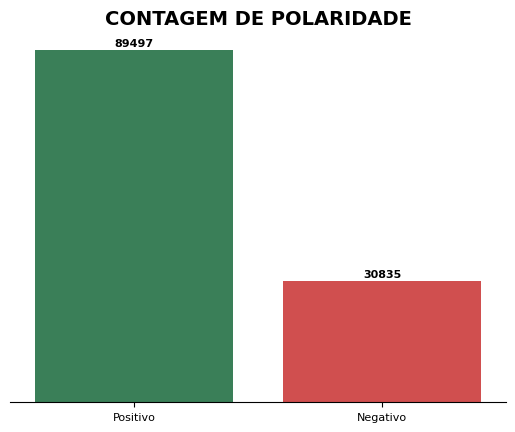

In [6]:
colors_polarity = ['#2E8B57', '#e53a3a']
ax = sns.countplot(data=df, x='polarity', palette=colors_polarity)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                fontsize=8, fontweight='bold', color='black')

sns.despine()
ax.yaxis.set_ticks([])
plt.ylabel('')
plt.xlabel('')
ax.set_title('CONTAGEM DE POLARIDADE', fontsize=14, fontweight='bold', color='black')

ax.spines['left'].set_visible(False)
ax.tick_params(axis='x', colors='black', labelsize=8)
ax.spines['bottom'].set_color('black')
ax.set_facecolor('none')
ax.title.set_y(1.08)

fig = plt.gcf()
fig.patch.set_facecolor('none')

plt.xlabel('')
plt.show()


#3 - Tratamento do texto

In [7]:
def tratar(df, coluna):

  palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
  pontuacao = []
  for ponto in punctuation:
    pontuacao.append(ponto)
  pontuacao_stopwords = pontuacao + palavras_irrelevantes
  token_pontuacao = tokenize.WordPunctTokenizer()
  sem_acentos = [unidecode.unidecode(texto) for texto in df[coluna]]
  stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
  stemmer = nltk.RSLPStemmer()

  df['texto_tratado'] = sem_acentos

  frase_processada = []

  for texto in df['texto_tratado']:

    nova_frase = []
    texto = texto.lower()
    texto = texto.replace('http','')
    texto = texto.replace('...','')
    texto = texto.replace('://','')
    texto = texto.replace('..','')
    texto = re.sub('\d','', texto)
    palavras_texto = token_pontuacao.tokenize(texto)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))

  df['texto_tratado'] = frase_processada

In [8]:
tratar(df,'review_text')

In [9]:
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusão')
    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Real')
    plt.show()

# 4 - Baseline Binário

## 4.1 - Logistic Regression

In [10]:
# Abordagem de Polaridade
var='polarity'
X = df['texto_tratado']
y = df[var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
vectorizer = TfidfVectorizer(max_df = 0.4, ngram_range = (1,3), max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
classifier = LogisticRegression(max_iter = 500, class_weight='balanced')
classifier.fit(X_train_tfidf, y_train)
X_test_tfidf = vectorizer.transform(X_test)
y_pred = classifier.predict(X_test_tfidf)
b_accuracy = balanced_accuracy_score(y_test, y_pred)
print('#------------------------------------------------------------#')
print("Balanced Accuracy:", b_accuracy)
print('#------------------------------------------------------------#')
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('#------------------------------------------------------------#')
print(classification_report(y_test, y_pred))
print('#------------------------------------------------------------#')
c_r = classification_report(y_test, y_pred)

#------------------------------------------------------------#
Balanced Accuracy: 0.9181414361164155
#------------------------------------------------------------#
Accuracy: 0.9104998545726514
#------------------------------------------------------------#
              precision    recall  f1-score   support

    Negativo       0.77      0.93      0.84      6184
    Positivo       0.98      0.90      0.94     17883

    accuracy                           0.91     24067
   macro avg       0.87      0.92      0.89     24067
weighted avg       0.92      0.91      0.91     24067

#------------------------------------------------------------#


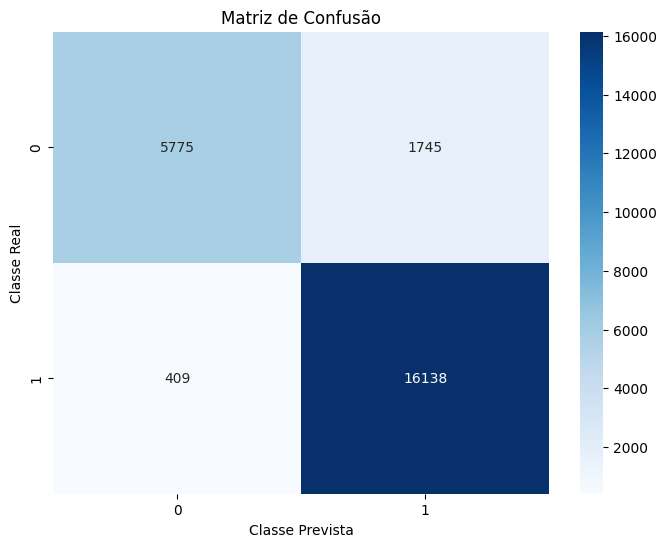

In [12]:
cm_log = confusion_matrix(y_pred,y_test)
plot_confusion_matrix(cm_log)

## 4.2 - Grid Search para a Regressão Logistica

In [15]:
### Grid Search no modelo de Regressão Logistica
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'tol': [0.0001, 0.001, 0.01],
          'solver': ['lbfgs', 'newton-cg']}
classifier = LogisticRegression(max_iter = 500, class_weight='balanced', n_jobs=-1, verbose=1)

gd = None

gd_path = './joblib/binary_gridsearch.joblib'
if(os.path.exists(gd_path)):
  gd = load(gd_path)
else:
  gd = GridSearchCV(classifier,params, scoring = 'balanced_accuracy', verbose = 1, cv = 2)
  gd.fit(X_train_tfidf, y_train)

In [16]:
print(gd.best_params_)
pd.DataFrame(gd.cv_results_).sort_values('mean_test_score', ascending = False).head(1)

{'C': 1, 'solver': 'newton-cg', 'tol': 0.0001}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,param_tol,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
22,0.430805,0.003548,0.135737,0.002282,1,newton-cg,0.001,"{'C': 1, 'solver': 'newton-cg', 'tol': 0.001}",0.912655,0.914815,0.913735,0.00108,1


In [17]:
# Adicionando a acuracia balanceada como driver da Regressão Logistica
classifier = LogisticRegression(max_iter = 500, class_weight='balanced', **gd.best_params_)
classifier.fit(X_train_tfidf, y_train)

X_val_tfidf = vectorizer.transform(X_val)
y_pred = classifier.predict(X_val_tfidf)


In [18]:
b_accuracy = balanced_accuracy_score(y_val, y_pred)
print('#------------------------------------------------------------#')
print("Balanced Accuracy:", b_accuracy)
print('#------------------------------------------------------------#')
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print('#------------------------------------------------------------#')
print(classification_report(y_val, y_pred))
print('#------------------------------------------------------------#')


#------------------------------------------------------------#
Balanced Accuracy: 0.9162714871594294
#------------------------------------------------------------#
Accuracy: 0.9099880538097959
#------------------------------------------------------------#
              precision    recall  f1-score   support

    Negativo       0.77      0.93      0.84      4925
    Positivo       0.97      0.90      0.94     14328

    accuracy                           0.91     19253
   macro avg       0.87      0.92      0.89     19253
weighted avg       0.92      0.91      0.91     19253

#------------------------------------------------------------#


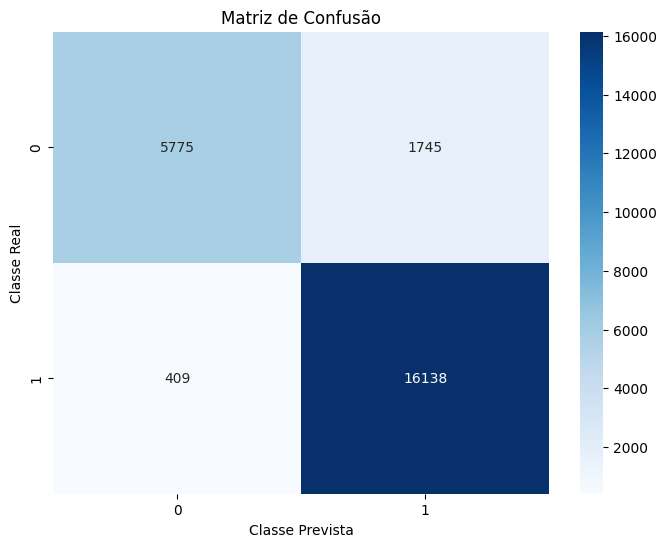

In [19]:
cm_log_bp = confusion_matrix(y_pred,y_val)
plot_confusion_matrix(cm_log)

## 4.3 -  Random Forest

In [20]:
rf = RandomForestClassifier(n_jobs=-1, verbose=1, class_weight = 'balanced')
rf.fit(X_train_tfidf, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomForestClassifier(class_weight='balanced', n_jobs=-1, verbose=1)

In [21]:
X_val_tfidf = vectorizer.transform(X_val)
y_pred = rf.predict(X_val_tfidf)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.5s finished


In [22]:
b_accuracy = balanced_accuracy_score(y_val, y_pred)
print('#------------------------------------------------------------#')
print("Balanced Accuracy:", b_accuracy)
print('#------------------------------------------------------------#')
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print('#------------------------------------------------------------#')
print(classification_report(y_val, y_pred))
print('#------------------------------------------------------------#')

#------------------------------------------------------------#
Balanced Accuracy: 0.8941479322727569
#------------------------------------------------------------#
Accuracy: 0.9197008258453228
#------------------------------------------------------------#
              precision    recall  f1-score   support

    Negativo       0.84      0.84      0.84      4925
    Positivo       0.95      0.95      0.95     14328

    accuracy                           0.92     19253
   macro avg       0.89      0.89      0.89     19253
weighted avg       0.92      0.92      0.92     19253

#------------------------------------------------------------#


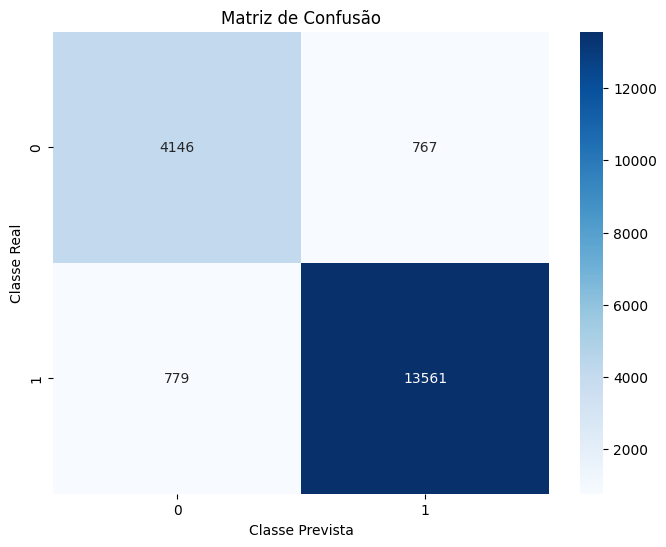

In [23]:
cm_rf = confusion_matrix(y_pred,y_val)
plot_confusion_matrix(cm_rf)

## 4.4 - Random Forest com GridSearch

In [26]:
### Grid Search no modelo de Random Forest
params = {'n_estimators': [100, 200, 400, 500],
          'max_depth': [None, 10, 50]}
rf = None
if(os.path.exists('./joblib/binary_randomforest.joblib')):
  rf_gd = load('./joblib/binary_randomforest.joblib')
else:
  rf_gd = RandomForestClassifier(n_jobs=-1, verbose=1, class_weight = 'balanced')
  rf_gd = GridSearchCV(rf_gd,params, scoring = 'balanced_accuracy', verbose = 1, cv = 2)
  rf_gd.fit(X_train_tfidf, y_train)
  print(rf_gd.best_params_)
  pd.DataFrame(rf_gd.cv_results_).sort_values('mean_test_score', ascending = False).head(1)


In [27]:
rf = RandomForestClassifier(n_jobs=-1, verbose=1, class_weight = 'balanced', **rf_gd.best_params_)
rf.fit(X_train_tfidf, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.4min finished


RandomForestClassifier(class_weight='balanced', max_depth=50, n_estimators=500,
                       n_jobs=-1, verbose=1)

In [29]:
X_val_tfidf = vectorizer.transform(X_val)
y_pred = rf.predict(X_val_tfidf)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    1.6s finished


In [30]:
b_accuracy = balanced_accuracy_score(y_val, y_pred)
print('#------------------------------------------------------------#')
print("Balanced Accuracy:", b_accuracy)
print('#------------------------------------------------------------#')
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print('#------------------------------------------------------------#')
print(classification_report(y_val, y_pred))
print('#------------------------------------------------------------#')

#------------------------------------------------------------#
Balanced Accuracy: 0.8977685381220825
#------------------------------------------------------------#
Accuracy: 0.9084298550875188
#------------------------------------------------------------#
              precision    recall  f1-score   support

    Negativo       0.79      0.88      0.83      4925
    Positivo       0.96      0.92      0.94     14328

    accuracy                           0.91     19253
   macro avg       0.87      0.90      0.88     19253
weighted avg       0.91      0.91      0.91     19253

#------------------------------------------------------------#


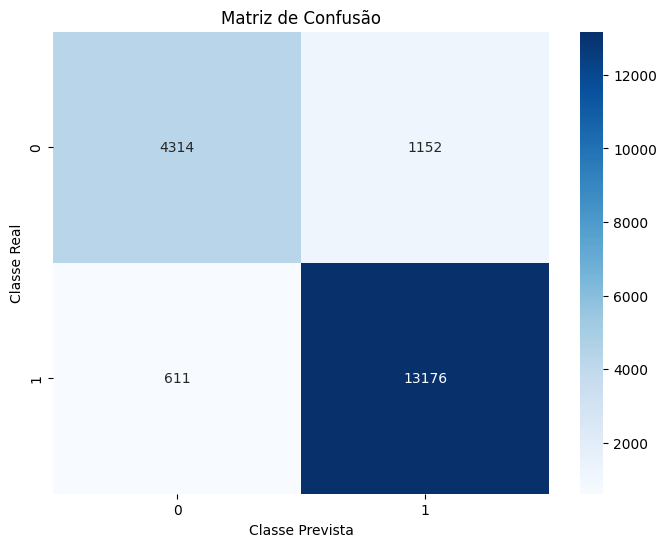

In [31]:
cm_rf_gs = confusion_matrix(y_pred,y_val)
plot_confusion_matrix(cm_rf_gs)

## 4.5 - Multinomial Naive Bayes

In [32]:
MNB = MultinomialNB()
MNB.fit(X_train_tfidf, y_train)

MultinomialNB()

In [33]:
bX_val_tfidf = vectorizer.transform(X_val)
y_pred = MNB.predict(X_val_tfidf)

b_accuracy = balanced_accuracy_score(y_val, y_pred)
print('#------------------------------------------------------------#')
print("Balanced Accuracy:", b_accuracy)
print('#------------------------------------------------------------#')
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print('#------------------------------------------------------------#')
print(classification_report(y_val, y_pred))
print('#------------------------------------------------------------#')

#------------------------------------------------------------#
Balanced Accuracy: 0.869417873348695
#------------------------------------------------------------#
Accuracy: 0.901833480496546
#------------------------------------------------------------#
              precision    recall  f1-score   support

    Negativo       0.81      0.80      0.81      4925
    Positivo       0.93      0.94      0.93     14328

    accuracy                           0.90     19253
   macro avg       0.87      0.87      0.87     19253
weighted avg       0.90      0.90      0.90     19253

#------------------------------------------------------------#


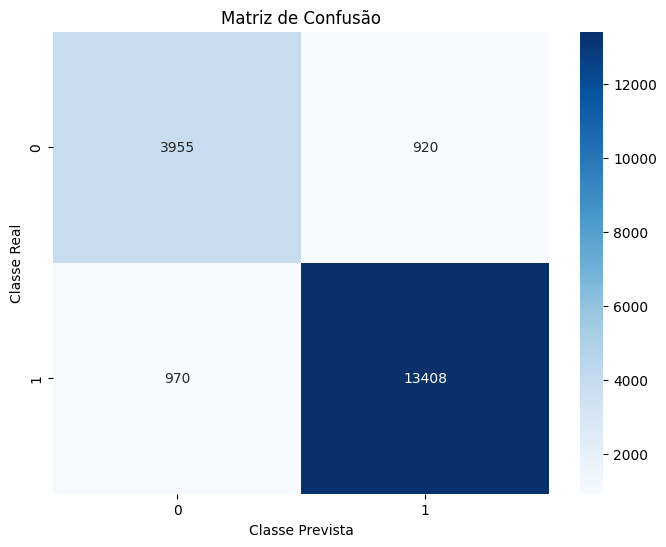

In [34]:
cm_mnb = confusion_matrix(y_pred,y_val)
plot_confusion_matrix(cm_mnb)

# 5 -  Preparação para aplicação de Transformers

In [35]:
df['polarity'] = df['polarity'].apply(lambda x : 1 if x == "Positivo" else 0)
df.rename(columns={'polarity':'target','review_text':'text'},inplace=True)
df = df[['text','target']]

In [36]:
test = df.sample(frac=0.1,random_state=42)

In [37]:
df = df.drop(test.index)

In [38]:
train, val = train_test_split(df,test_size=0.2,random_state=42)

In [39]:
dataset_train = Dataset.from_pandas(train,preserve_index=False)
dataset_val = Dataset.from_pandas(val,preserve_index=False)

In [40]:
model_name = 'neuralmind/bert-base-portuguese-cased'
tokenizer = AutoTokenizer.from_pretrained(model_name,do_lower_case=False)
# tokenizer = AutoTokenizer.from_pretrained(model_name,do_lower_case=True)

In [41]:
def tokenize_function(sample):
    return tokenizer(sample['text'],truncation=True,max_length=512)

tokenized_dataset_train = dataset_train.map(tokenize_function)
tokenized_dataset_val = dataset_val.map(tokenize_function)

Map:   0%|          | 0/86639 [00:00<?, ? examples/s]

Map:   0%|          | 0/21660 [00:00<?, ? examples/s]

In [42]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer,return_tensors='tf')

In [43]:
tf_train_dataset = tokenized_dataset_train.to_tf_dataset(
    columns=['attention_mask','input_ids','token_type_ids'],
    label_cols=['target'],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8
)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:385: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [44]:
tf_val_dataset = tokenized_dataset_val.to_tf_dataset(
    columns=['attention_mask','input_ids','token_type_ids'],
    label_cols=['target'],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8
)

##5.1- Transformer Bertimbau

In [51]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

model = None
fit = False

bert_path = './binary_classifier_saved'
if(os.path.exists(bert_path)):
  model = TFAutoModelForSequenceClassification.from_pretrained(bert_path,num_labels=2)
else:
  model = TFAutoModelForSequenceClassification.from_pretrained(model_name,num_labels=2)
  model.compile(
      optimizer = opt,
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics = ['accuracy'],
  )

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at ./binary_classifier_saved.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [52]:
model.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108923136 
                                                                 
 dropout_75 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 108,924,674
Trainable params: 108,924,674
Non-trainable params: 0
_________________________________________________________________


In [53]:
df_contagem = train['target'].value_counts().reset_index()
df_contagem['weights'] = len(train)/df_contagem['target']
df_contagem

,index,target,weights
0,1,64472,1.343824
1,0,22167,3.908468


In [54]:
class_weights_dict = dict(zip(df_contagem['index'], df_contagem['weights']))
class_weights_dict

{1: 1.3438236753939694, 0: 3.908467541841476}

In [55]:

if fit:
 model.fit(tf_train_dataset, validation_data=tf_val_dataset,epochs=2,class_weight=class_weights_dict)

# rodar com mais epocas
# utilizar class weights como balanceamento

In [56]:
preds = model.predict(tf_val_dataset,verbose=1)

2708/2708 [==============================] - 202s 72ms/step


In [57]:
tf.nn.softmax(preds['logits']).numpy()

array([[0.003008  , 0.996992  ],
       [0.98417974, 0.01582026],
       [0.00705322, 0.9929468 ],
       ...,
       [0.00260819, 0.9973918 ],
       [0.00265793, 0.99734205],
       [0.00275878, 0.99724126]], dtype=float32)

In [58]:
model.save_weights('model_b2w_2epocas.hdf5')

In [59]:
new_model = TFAutoModelForSequenceClassification.from_pretrained(model_name,num_labels=2)
new_model.load_weights('model_b2w_2epocas.hdf5')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier', 'bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# 6 - Aplicando o melhor modelo no conjunto de teste

In [60]:
dataset_test = Dataset.from_pandas(test,preserve_index=False)
tokenized_dataset_test = dataset_test.map(tokenize_function)

Map:   0%|          | 0/12033 [00:00<?, ? examples/s]

In [61]:
tf_test_dataset = tokenized_dataset_test.to_tf_dataset(
    columns=['attention_mask','input_ids','token_type_ids'],
    label_cols=['target'],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8
)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:385: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [62]:
preds_test = new_model.predict(tf_test_dataset,verbose=1)
predict_proba = tf.nn.softmax(preds_test['logits'])
probs_array = predict_proba.numpy()
y_pred = np.argmax(probs_array, axis=1)
y_true = test['target']

1505/1505 [==============================] - 113s 73ms/step


In [63]:
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

b_accuracy = balanced_accuracy_score(y_true,y_pred)
print("Balanced Accuracy:",b_accuracy)

Accuracy: 0.9490567605750851
Balanced Accuracy: 0.9439265108565216


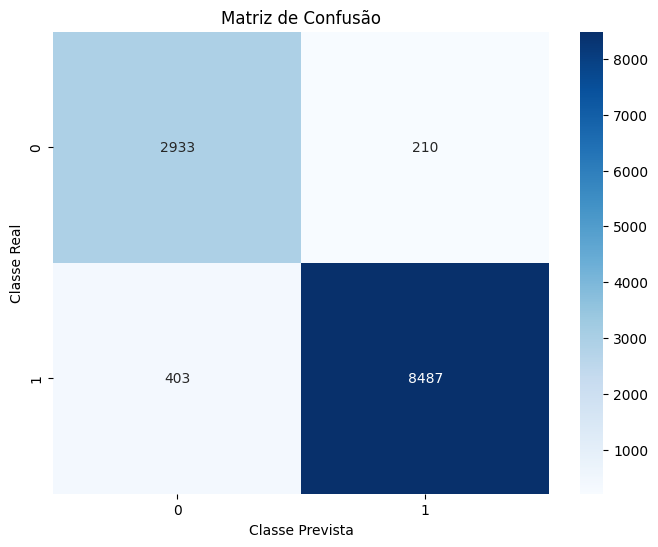

In [64]:
cm_tbert = confusion_matrix(y_true,y_pred)
plot_confusion_matrix(cm_tbert)

In [65]:
gd

GridSearchCV(cv=2,
             estimator=LogisticRegression(class_weight='balanced', max_iter=500,
                                          n_jobs=-1, verbose=1),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'newton-cg'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='balanced_accuracy', verbose=1)

In [66]:
dump(rf_gd, 'binary_randomforest.joblib')

['binary_randomforest.joblib']

In [67]:
#cp -av ./binary_randomforest.joblib /content/drive/MyDrive/INF-0619/joblib

'./binary_randomforest.joblib' -> '/content/drive/MyDrive/INF-0619/joblib/binary_randomforest.joblib'


In [68]:
# dump(gd, 'binary_gridsearch.joblib')

In [69]:
# !cp -av ./binary_classifier_saved/ /content/drive/MyDrive/INF-0619/

In [70]:
# !cp -av ./joblib/ /content/drive/MyDrive/INF-0619/

In [71]:
# from google.colab import drive
# drive.mount('/content/drive')

In [72]:
# new_model.save_pretrained('binary_classifier_saved')